In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import utils
import matplotlib.pyplot as plt

sns.set_theme()

In [2]:
tickers = ["LICI", "CUMMINSIND", "TCS", "LTTS", "HCLTECH", "SUNPHARMA", "CIPLA"]

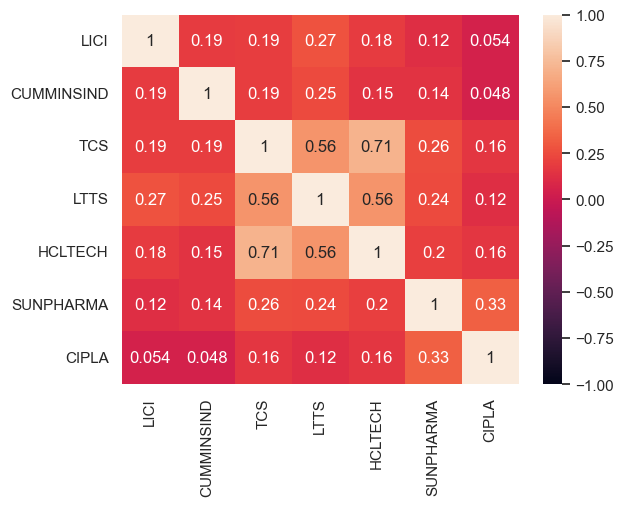

In [3]:
ret = utils.get_multiple_returns(tickers)
sns.heatmap(ret.corr(), vmin=-1, vmax=1, annot=True)
plt.savefig("../res/heatmap.png")

<Axes: xlabel='Date', ylabel='Returns'>

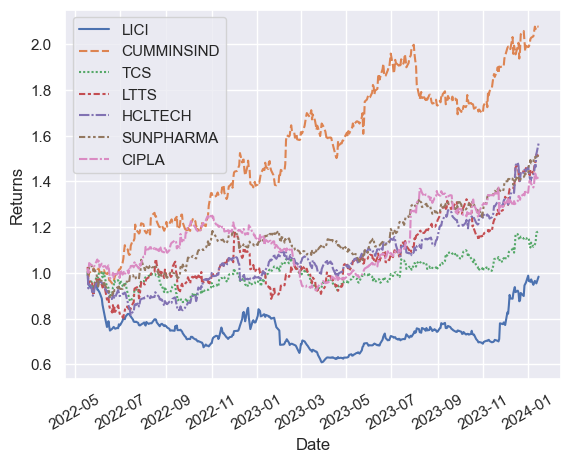

In [32]:
plt.ylabel("Returns")
plt.xticks(rotation=30)
sns.lineplot((1 + ret).cumprod())

In [33]:
def plot_against_nifty(ret: pd.DataFrame, w: np.ndarray, filename):
    plt.title("Portfolio returns vs NIFTY 50")
    df = pd.merge(
        (1 + ret @ w).cumprod(),
        utils.get_returns("^NSEI", index=True),
        on="Date",
        how="inner",
    ).rename(columns={0: "Portfolio", "^NSEI": "NIFTY50"})
    df["NIFTY50"] = (1 + df["NIFTY50"]).cumprod()
    df.index = df["Date"]
    df = df.drop(columns=["Date"])
    lplot = sns.lineplot(df)
    plt.xticks(rotation=45)
    plt.savefig(filename)

# Tangency Portfolio


ic| 'Fetching ticker data'
ic| 'Running GA'


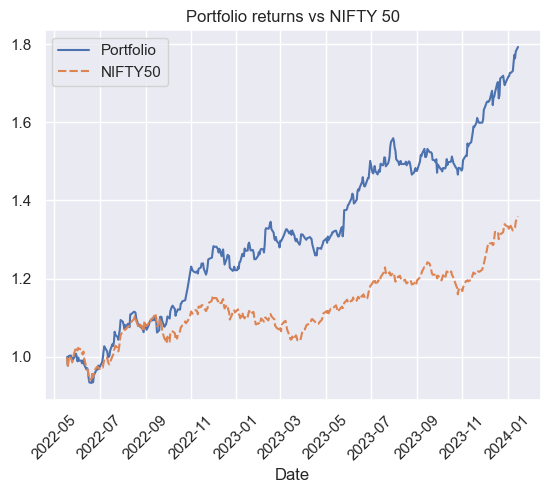

In [34]:
po_tangency = utils.PortfolioOptimizer(tickers=tickers, rf=0.0721, tangency=True)
w_tangency = po_tangency.optimize_portfolio()

plot_against_nifty(ret, w_tangency, "../res/tangency.png")

In [46]:
writer = pd.ExcelWriter("../res/report.xlsx", engine="xlsxwriter")

In [47]:
ret.to_excel(writer, "Returns data", float_format="%.4f")
worksheet = writer.sheets["Returns data"]
worksheet.insert_image("H1", "../res/heatmap.png")
worksheet.autofit()

In [48]:
po_tangency.portfolio_to_excel(writer, "Tangency Portfolio", "../res/tangency.png")

# Minimum Variance Portfolio


In [49]:
po = utils.PortfolioOptimizer(tickers=tickers, rf=0.0721, tangency=False)
w_min_var = po.optimize_portfolio()

df_w_min_var = utils.weights_to_pd(w_min_var, tickers)
df_w_min_var

ic| 'Fetching ticker data'
ic| 'Running GA'


,w
LICI,0.133915
CUMMINSIND,0.157835
TCS,0.132399
LTTS,0.000044
HCLTECH,0.092628
SUNPHARMA,0.291975
CIPLA,0.191204


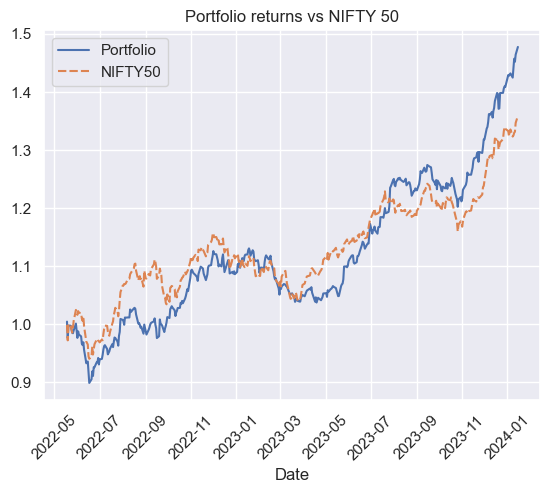

In [50]:
plot_against_nifty(ret, w_min_var, "../res/min_var.png")

## Export to Excel


In [51]:
po.portfolio_to_excel(writer, "Minimum Variance Portfolio", "../res/min_var.png")

# Equal Weight Portfolio


In [52]:
w_equ = np.ones((len(tickers), 1)) / len(tickers)
utils.weights_to_pd(w_equ, tickers)

,w
LICI,0.142857
CUMMINSIND,0.142857
TCS,0.142857
LTTS,0.142857
HCLTECH,0.142857
SUNPHARMA,0.142857
CIPLA,0.142857


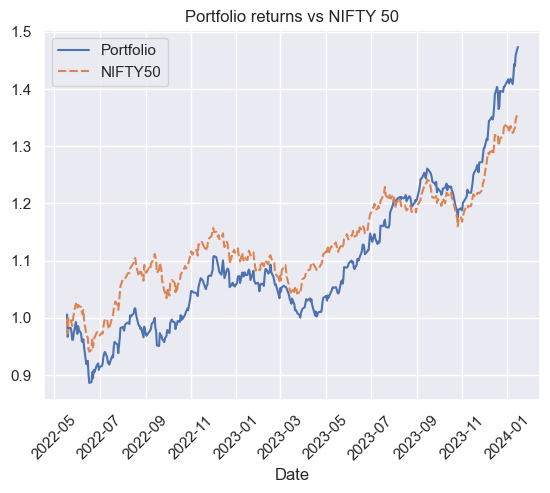

In [53]:
plot_against_nifty(ret, w_equ, "../res/equal.png")

In [54]:
po_equ = utils.PortfolioOptimizer(tickers=tickers, rf=0.0721, tangency=False)
po_equ.w = w_equ

ic| 'Fetching ticker data'


In [55]:
po.sharpe()

1.746975313505198

In [56]:
po_equ.portfolio_to_excel(writer, "Equal Weight Portfolio", "../res/equal.png")
writer.close()